In [33]:
import os
import requests
import datetime
import numpy as np
import matplotlib.pyplot as plt
import xarray
import rasterio as rs
from rasterio import plot, mask
from rasterio.features import rasterize
import rioxarray

from shapely import Polygon, LineString

import geopandas as gpd
import pandas as pd

import earthpy.spatial as es

import cmcrameri.cm as cmc

In [4]:
def reproject_raster(src, target_crs):
    '''
    Change crs of imported data
    '''
    
    src_crs = src.crs
    src_transform = src.transform
    src_width = src.width
    src_height = src.height

    # Define the target CRS
    target_crs = target_crs

    # Reproject the raster data to the target CRS
    reprojected_data, dst_transform = rs.warp.reproject(
        source=rs.band(src, 1),
        src_transform=src_transform,
        src_crs=src_crs,
        dst_crs=target_crs,
        resampling=rs.enums.Resampling.nearest)
    
    return reprojected_data, dst_transform, target_crs

In [5]:
# load DEM
file = '../data/SETSM_s2s041_WV03_20201223_104001006473AD00_10400100649D5800_2m_lsf_seg1_dem.tif'
src = rs.open(file)
dem = src.read()
tr = src.transform
src, tr, crs = reproject_raster(src, 'EPSG:3031')

# load ICEsat-2 kmls
kml = gpd.GeoDataFrame.from_file('../shapes/rgt/shackleton_ICESat-2_tracks_cycle22.shp')

In [6]:

# load ICEsat-2 kmls
file = '../shapes/rgt/shackleton_ICESat-2_tracks_cycle22.geojson'
#kml = gpd.GeoDataFrame.from_file(file).set_crs('EPSG:4326').to_crs('EPSG:3031')
gj = gpd.GeoDataFrame.from_file(file).set_crs('EPSG:4326').to_crs('EPSG:3031')

In [16]:
src[0].shape

(12796, 10577)

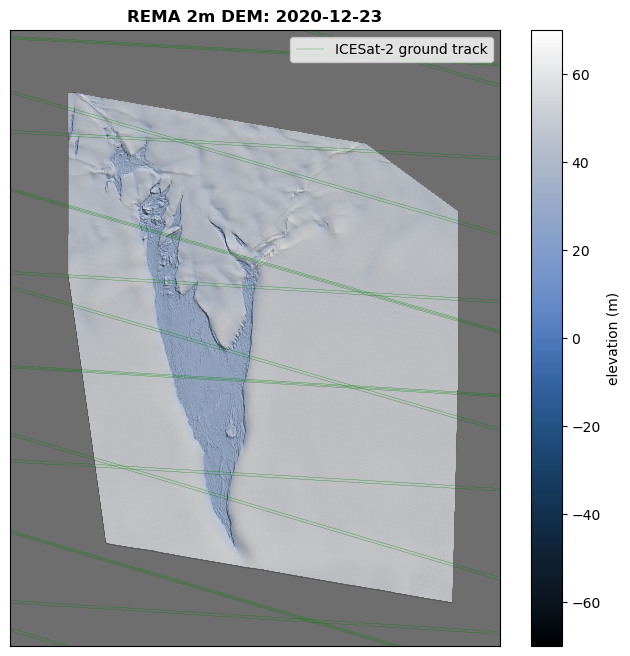

In [63]:
vmin, vmax = -70, 70
titl = 'REMA 2m DEM: 2020-12-23'
xlim = [2.5675e6, 2.5850e6]
ylim = [-457000, -435000]

######################

fig, ax = plt.subplots(figsize=[8, 8])
# has some kwargs but also passes some to plt.imshow()
#img = plot.show(src, ax=ax, transform=tr, cmap='Greys_r', title=titl, vmin=vmin, vmax=vmax, aspect='equal')
src_hs = es.hillshade(src[0])
img = plot.show(src_hs, ax=ax, transform=tr, cmap='Greys_r', 
    aspect='equal', title=titl, vmin=100, vmax=250)
img = plot.show(src, ax=ax, transform=tr, cmap=cmc.oslo, vmin=vmin, vmax=vmax, title=titl, aspect='equal', alpha=0.4)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xticks([])
ax.set_yticks([])

#gj.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=1)
gj[gj.geometry.geom_type=="MultiLineString"].plot(ax=ax, facecolor='none', edgecolor='green', linewidth=0.2, label='ICESat-2 ground track', alpha=1)

sm = plt.cm.ScalarMappable(cmap=cmc.oslo, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
ax.legend()

cbar = plt.colorbar(sm, ax=ax, fraction=0.05)
cbar.set_label('elevation (m)')

#line_coords = [[99.755906,-66.298107], [99.771502,-66.242697]]
line_coords_34_gt1r = [[2571164,-445327], [2576914,-446992]]
line_coords_34_gt1r = [[2571164,-445327+200], [2576914,-446992+200]]
line_coords_1185_gt1l = [[2571670.49,-443868.03], [2578631.05,-444278.30]]
x, y = LineString(line_coords_34_gt1r).xy
#ax.plot(x, y, color='white')

x, y = LineString(line_coords_1185_gt1l).xy
#ax.plot(x, y, color='white')

In [59]:
gj[gj.geometry.geom_type=="MultiLineString"]

,id,rgt,timestamp,time_str,geometry
13,None,34,1.703125e+09,Thu 2023-Dec-21 02:13:00,"MULTILINESTRING ((2653950.473 -465938.540, 265..."
37,None,95,1.703470e+09,Mon 2023-Dec-25 02:04:41,"MULTILINESTRING ((2653988.793 -428145.609, 265..."
58,None,118,1.703601e+09,Tue 2023-Dec-26 14:25:48,"MULTILINESTRING ((2492887.209 -522777.014, 249..."
69,None,156,1.703815e+09,Fri 2023-Dec-29 01:56:20,"MULTILINESTRING ((2653491.733 -390439.154, 265..."
87,None,179,1.703946e+09,Sat 2023-Dec-30 14:17:31,"MULTILINESTRING ((2493727.839 -488364.654, 249..."
111,None,240,1.704291e+09,Wed 2024-Jan-03 14:09:10,"MULTILINESTRING ((2494096.144 -454027.671, 249..."
135,None,301,1.704636e+09,Sun 2024-Jan-07 14:00:50,"MULTILINESTRING ((2493994.351 -419772.617, 249..."
151,None,354,1.704935e+09,Thu 2024-Jan-11 01:05:45,"MULTILINESTRING ((2561415.842 -524854.968, 256..."
171,None,362,1.704981e+09,Thu 2024-Jan-11 13:52:29,"MULTILINESTRING ((2493424.700 -385602.589, 249..."
195,None,415,1.705280e+09,Mon 2024-Jan-15 00:57:21,"MULTILINESTRING ((2653062.798 -516445.629, 265..."


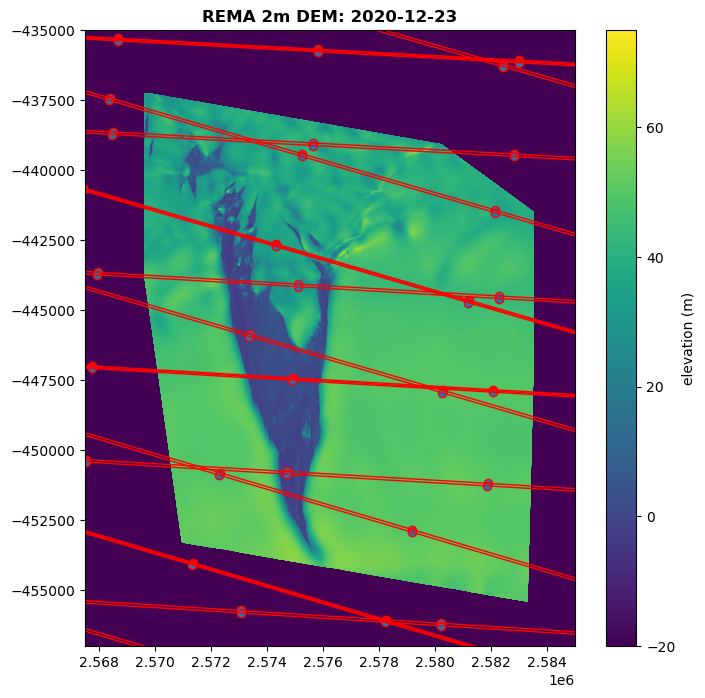

In [154]:
vmin, vmax = -20, 75
titl = 'REMA 2m DEM: 2020-12-23'
xlim = [2.5675e6, 2.5850e6]
ylim = [-457000, -435000]

######################

fig, ax = plt.subplots(figsize=[8, 8])
# has some kwargs but also passes some to plt.imshow()
img = plot.show(src, ax=ax, transform=tr, cmap='viridis', title=titl, vmin=vmin, vmax=vmax, aspect='equal')
ax.set_xlim(xlim)
ax.set_ylim(ylim)

gj.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=1)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, fraction=0.05)
cbar.set_label('elevation (m)')

#line_coords = [[99.755906,-66.298107], [99.771502,-66.242697]]
line_coords_34_gt1r = [[2571164,-445327], [2576914,-446992]]
line_coords_34_gt1r = [[2571164,-445327+200], [2576914,-446992+200]]
line_coords_1185_gt1l = [[2571670.49,-443868.03], [2578631.05,-444278.30]]
x, y = LineString(line_coords_34_gt1r).xy
#ax.plot(x, y, color='white')

x, y = LineString(line_coords_1185_gt1l).xy
#ax.plot(x, y, color='white')

Text(0.5, 1.0, 'REMA 2m DEM: 2020-12-23 sampled along IS2 RGT 34 gt1r')

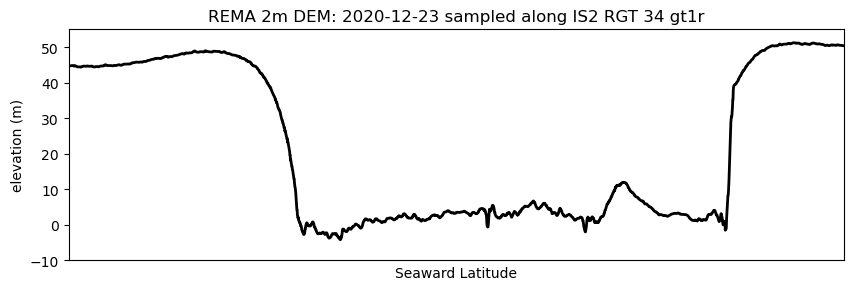

In [151]:
line_coords_34_gt1r = [[2571164,-445327], [2576914,-446992]]

mask = rasterize([LineString(line_coords_34_gt1r)], out_shape=src.shape[1:], transform=tr)
dat = src[0]
track = dat[mask==1]

plt.figure(figsize=[10, 3])
plt.plot(track, color='black', linewidth=2)
plt.ylim([-10, 55])
plt.xlim([0,2900]) 
plt.ylabel('elevation (m)')
plt.xticks([])
plt.xlabel('Seaward Latitude')
plt.title('REMA 2m DEM: 2020-12-23 sampled along IS2 RGT 34 gt1r')

Text(0.5, 1.0, 'REMA 2m DEM: 2020-12-23 sampled along IS2 RGT 1185 gt1l')

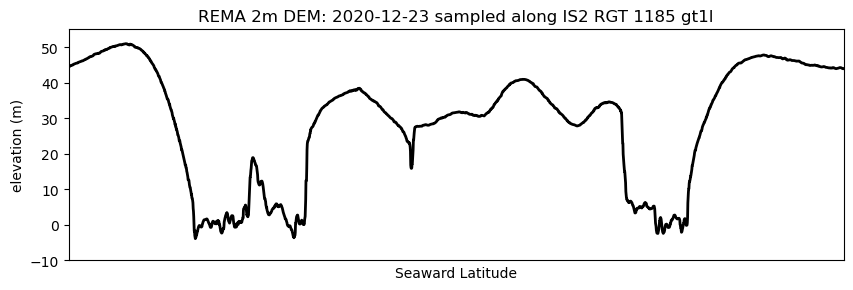

In [146]:
mask = rasterize([LineString(line_coords_1185_gt1l)], out_shape=src.shape[1:], transform=tr)
dat = src[0]
track = dat[mask==1]

plt.figure(figsize=[10, 3])
plt.plot(track, color='black', linewidth=2)
plt.ylim([-10, 55])
plt.xlim([0,2900]) 
plt.ylabel('elevation (m)')
plt.xticks([])
plt.xlabel('Seaward Latitude')
plt.title('REMA 2m DEM: 2020-12-23 sampled along IS2 RGT 1185 gt1l')

(-9.0, 69.0)

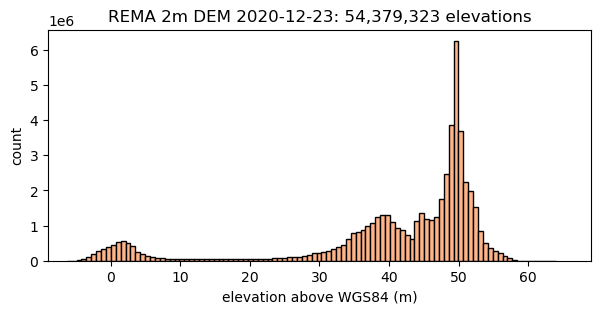

In [153]:
plt.figure(figsize=[7, 3])
length = len(dat[dat>-2000])
plt.hist(np.ndarray.flatten(dat[dat>-2000]), 100, density=False, color='#ffb58a', edgecolor='black')
plt.xlabel('elevation above WGS84 (m)')
plt.ylabel('count')
plt.title(f'REMA 2m DEM 2020-12-23: {length:,} elevations')
plt.xlim([-9, 69])